In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
data=pd.read_csv("seeds.txt",delimiter="\t",header=0)

In [3]:
print(data)

      area  perimeter  compact  length_k  width_k   asym  length_k_g  group
0    15.26      14.84   0.8710     5.763    3.312  2.221       5.220      1
1    14.88      14.57   0.8811     5.554    3.333  1.018       4.956      1
2    14.29      14.09   0.9050     5.291    3.337  2.699       4.825      1
3    13.84      13.94   0.8955     5.324    3.379  2.259       4.805      1
4    16.14      14.99   0.9034     5.658    3.562  1.355       5.175      1
..     ...        ...      ...       ...      ...    ...         ...    ...
205  12.19      13.20   0.8783     5.137    2.981  3.631       4.870      3
206  11.23      12.88   0.8511     5.140    2.795  4.325       5.003      3
207  13.20      13.66   0.8883     5.236    3.232  8.315       5.056      3
208  11.84      13.21   0.8521     5.175    2.836  3.598       5.044      3
209  12.30      13.34   0.8684     5.243    2.974  5.637       5.063      3

[210 rows x 8 columns]


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area        210 non-null    float64
 1   perimeter   210 non-null    float64
 2   compact     210 non-null    float64
 3   length_k    210 non-null    float64
 4   width_k     210 non-null    float64
 5   asym        210 non-null    float64
 6   length_k_g  210 non-null    float64
 7   group       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [5]:
dist = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k).fit(data.drop('group', axis=1))
    dist[k] = km.inertia_
dist

{1: 2719.8524101779526,
 2: 1011.7123453151188,
 3: 587.3186115940429,
 4: 471.0033955251924,
 5: 385.507292349044,
 6: 323.39145080573337,
 7: 277.64329708904916,
 8: 241.1906739470517,
 9: 217.92095595123405}

Text(0.5, 1.0, 'Elbow Curve')

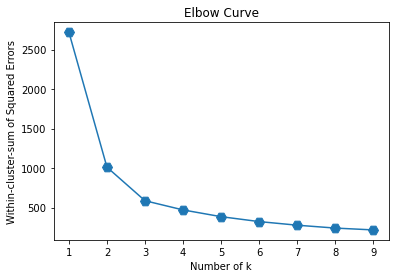

In [6]:
plt.plot(list(dist.keys()), list(dist.values()), marker='H', markersize=10)
plt.xlabel('Number of k')
plt.ylabel('Within-cluster-sum of Squared Errors')
plt.title('Elbow Curve')

In [7]:
scaler = StandardScaler()
scaler.fit(data.iloc[:, 0:7])
feature=scaler.transform(data.iloc[:, 0:7])
feature

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

In [8]:
km = KMeans(n_clusters=3, random_state=42)

In [9]:
km_pred = km.fit_predict(feature)
km_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [10]:
np.array(data['group'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [11]:
# Just interchange the lable of prediction, this won't change the clustering result
for i in range(len(km_pred)):
    if km_pred[i] == 0:
        km_pred[i] = 2
    elif km_pred[i] == 1:
        km_pred[i] = 3
    elif km_pred[i] == 2:
        km_pred[i] = 1
km_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 1,
       1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [12]:
print(classification_report(data['group'], km_pred, target_names=['1', '2', '3']))

              precision    recall  f1-score   support

           1       0.87      0.89      0.88        70
           2       0.97      0.93      0.95        70
           3       0.92      0.94      0.93        70

    accuracy                           0.92       210
   macro avg       0.92      0.92      0.92       210
weighted avg       0.92      0.92      0.92       210



In [13]:
centers = km.cluster_centers_
centers

array([[ 1.25668163,  1.26196622,  0.56046437,  1.23788278,  1.16485187,
        -0.04521936,  1.29230787],
       [-1.03025257, -1.00664879, -0.9649051 , -0.89768501, -1.08558344,
         0.69480448, -0.62480856],
       [-0.14111949, -0.17004259,  0.4496064 , -0.25781445,  0.00164694,
        -0.66191867, -0.58589311]])

In [14]:
data['kmeans_labels'] = km.labels_
data

,area,perimeter,compact,length_k,width_k,asym,length_k_g,group,kmeans_labels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,1
...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,3


In [15]:
data.kmeans_labels.value_counts()

3    72
1    71
2    67
Name: kmeans_labels, dtype: int64

In [16]:
data.group.value_counts()

3    70
2    70
1    70
Name: group, dtype: int64

In [17]:
pca = PCA(n_components=3)
feature_transform = pca.fit_transform(feature)

In [18]:
principal_seed_data = pd.DataFrame(data = feature_transform, columns = ['principal component 1', 'principal component 2','principal component 3'])
principal_seed_data.tail()

,principal component 1,principal component 2,principal component 3
205,-1.991107,0.865956,0.513303
206,-2.726865,-0.208190,-0.059059
207,-1.403633,-1.298593,2.905811
208,-2.339328,0.099699,-0.382515
209,-1.955953,-0.525071,1.013113


In [19]:
print('Explained variation per principal compoents {}'.format(pca.explained_variance_ratio_))

Explained variation per principal compoents [0.71874303 0.17108184 0.09685763]


In [20]:
data['principal component 1']=principal_seed_data['principal component 1']
data['principal component 2']=principal_seed_data['principal component 2']
data['principal component 3']=principal_seed_data['principal component 3']

In [21]:
data

,area,perimeter,compact,length_k,width_k,asym,length_k_g,group,kmeans_labels,principal component 1,principal component 2,principal component 3
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,1,0.317047,0.783669,-0.631010
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,1,-0.003386,1.913214,-0.669754
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,1,-0.459443,1.907225,0.932489
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,1,-0.591936,1.931069,0.499311
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,1,1.102910,2.068090,0.056705
...,...,...,...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,3,-1.991107,0.865956,0.513303
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,3,-2.726865,-0.208190,-0.059059
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,3,-1.403633,-1.298593,2.905811
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,3,-2.339328,0.099699,-0.382515


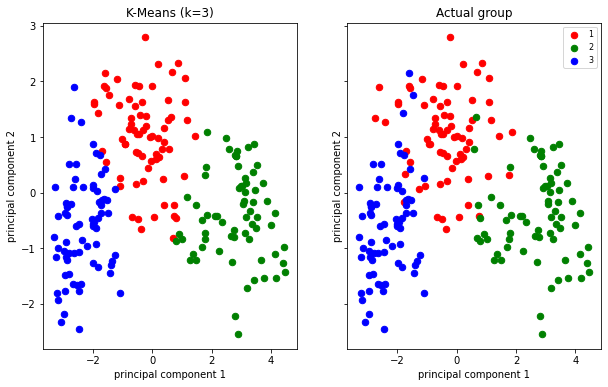

In [22]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 6))

ax1.set_title('K-Means (k=3)')
targets = [1,2,3]
colors = ['r', 'g','b']
for target, colour in zip(targets,colors):
    indicesToKeep = data['kmeans_labels'] == target
    ax1.scatter(data.loc[indicesToKeep, 'principal component 1'],data.loc[indicesToKeep, 'principal component 2'],c = colour, s = 42)
for target, colour in zip(targets,colors):
    indicesToKeep = data['group'] == target
    ax2.scatter(data.loc[indicesToKeep, 'principal component 1'],data.loc[indicesToKeep, 'principal component 2'],c = colour, s = 42)
                
ax1.set_xlabel('principal component 1')
ax1.set_ylabel('principal component 2')
ax2.set_xlabel('principal component 1')
ax2.set_ylabel('principal component 2')
ax2.set_title('Actual group')
plt.legend(targets,prop={'size': 8})

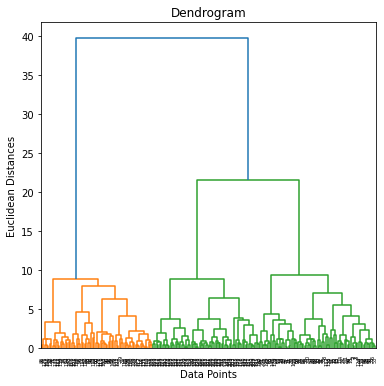

In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[6,6])
merg = linkage(feature, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [24]:
hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster2 = hie_clus.fit_predict(feature)

In [25]:
cluster2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
data['group'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [27]:
for i in range(len(cluster2)):
    if cluster2[i] == 0:
        cluster2[i] = 1
    elif cluster2[i] == 1:
        cluster2[i] = 2
    elif cluster2[i] == 2:
        cluster2[i] = 3
cluster2


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3])

In [28]:
data["hie_labels"]=cluster2

In [29]:
data

,area,perimeter,compact,length_k,width_k,asym,length_k_g,group,kmeans_labels,principal component 1,principal component 2,principal component 3,hie_labels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,1,0.317047,0.783669,-0.631010,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,1,-0.003386,1.913214,-0.669754,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,1,-0.459443,1.907225,0.932489,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,1,-0.591936,1.931069,0.499311,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,1,1.102910,2.068090,0.056705,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,3,-1.991107,0.865956,0.513303,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,3,-2.726865,-0.208190,-0.059059,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,3,-1.403633,-1.298593,2.905811,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,3,-2.339328,0.099699,-0.382515,3


In [30]:
print(classification_report(data['group'], cluster2, target_names=['1', '2', '3']))

              precision    recall  f1-score   support

           1       0.88      0.91      0.90        70
           2       0.94      0.94      0.94        70
           3       0.97      0.93      0.95        70

    accuracy                           0.93       210
   macro avg       0.93      0.93      0.93       210
weighted avg       0.93      0.93      0.93       210



In [31]:
data.group.value_counts()

3    70
2    70
1    70
Name: group, dtype: int64

In [32]:
data.hie_labels.value_counts()

1    73
2    70
3    67
Name: hie_labels, dtype: int64

In [33]:
data.kmeans_labels.value_counts()

3    72
1    71
2    67
Name: kmeans_labels, dtype: int64

Text(0.5, 1.0, 'hierachical_labels')

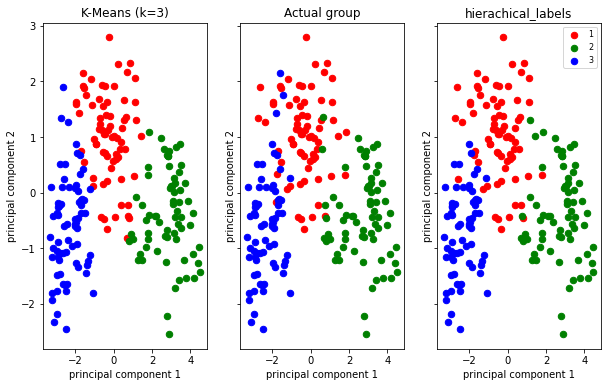

In [34]:
f, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(10, 6))

ax1.set_title('K-Means (k=3)')
targets = [1,2,3]
colors = ['r', 'g','b']
for target, colour in zip(targets,colors):
    indicesToKeep = data['kmeans_labels'] == target
    ax1.scatter(data.loc[indicesToKeep, 'principal component 1'],data.loc[indicesToKeep, 'principal component 2'],c = colour, s = 42)
for target, colour in zip(targets,colors):
    indicesToKeep = data['group'] == target
    ax2.scatter(data.loc[indicesToKeep, 'principal component 1'],data.loc[indicesToKeep, 'principal component 2'],c = colour, s = 42)
for target, colour in zip(targets,colors):
    indicesToKeep = data['hie_labels'] == target
    ax3.scatter(data.loc[indicesToKeep, 'principal component 1'],data.loc[indicesToKeep, 'principal component 2'],c = colour, s = 42)               
    
ax1.set_xlabel('principal component 1')
ax1.set_ylabel('principal component 2')
ax2.set_xlabel('principal component 1')
ax2.set_ylabel('principal component 2')
ax2.set_title('Actual group')
plt.legend(targets,prop={'size': 8})
ax3.set_xlabel('principal component 1')
ax3.set_ylabel('principal component 2')
ax3.set_title('hierachical_labels')

